# Дипломная работа

## Постановка общей задачи

Данные из Google Analytics (last-click attribution model) по сайту
«СберАвтоподписка».

### GA Sessions (ga_sessions.csv)
`Одна строка = один визит на сайт.`

### Описание атрибутов:  
- `session_id` — ID визита;  
- `client_id` — ID посетителя;  
- `visit_date` — дата визита;  
- `visit_time` — время визита;  
- `visit_number` — порядковый номер визита клиента;  
- `utm_source` — канал привлечения;  
- `utm_medium` — тип привлечения;  
- `utm_campaign` — рекламная кампания;  
- `utm_keyword` — ключевое слово;  
- `device_category` — тип устройства;  
- `device_os` — ОС устройства;  
- `device_brand` — марка устройства;  
- `device_model` — модель устройства;  
- `device_screen_resolution` — разрешение экрана;  
- `device_brand` — марка устройства;  
- `device_model` — модель устройства;   
- `device_browser` — браузер;  
- `geo_country` — страна;  
- `geo_city` — город.  

### GA Hits (ga_hits.csv)   
`Одна строка = одно событие в рамках одного визита на сайт.`
### Описание атрибутов:  
- `session_id` — ID визита;  
- `hit_date` — дата события;  
- `hit_time` — время события;  
- `hit_number` — порядковый номер события в рамках сессии;  
- `hit_type` — тип события;  
- `hit_referer` — источник события;  
- `hit_page_path` — страница события;  
- `event_category` — тип действия;  
- `event_action` — действие;  
- `event_label` — тег действия;  
- `event_value` — значение результата действия.  

## Задачи:  

 - Провести базовую чистку данных(дубликаты, пустые значения, типизация данных, ненужные атрибуты)
 - Посмотреть на распределение ключевых атрибутов и их отношения.

In [1]:
#  импорт нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
from pathlib import Path
import json
import wget

In [ ]:
# скачиваем основные файлы для работы, вес файлов 4+ GB
url_ga_hits = "https://drive.google.com/u/0/uc?id=1iW0GBTox3BMdn_kRiH88LIIj_OCp-3zI&export=download"
url_ga_sessions = "https://drive.google.com/u/0/uc?id=1YK_SOKFXhLaWdgdQglLxEoAsOMCA7M4x&export=download"

wget.download(url_ga_hits, 'ga_hits.csv')
wget.download(url_ga_sessions, 'ga_sessions.csv')

# Data Preparation

## GA_Hits.csv

In [2]:
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
print(f'Структура таблицы df_hits: {df_hits.shape}')

Структура таблицы df_hits: (15726470, 11)


In [4]:
df_hits.isna().sum()

session_id               0
hit_date                 0
hit_time           9160322
hit_number               0
hit_type                 0
hit_referer        6274804
hit_page_path            0
event_category           0
event_action             0
event_label        3760184
event_value       15726470
dtype: int64

In [5]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [5]:
# поиски дубликатов
df_hits.duplicated().sum()

0

In [6]:
# сразу удалим ненужные признаки
# сюда включены признаки со слишком большим количеством пропусков и признаки с нечитаемой информацией
df_hits = df_hits.drop(columns=['event_value', 'hit_page_path', 'hit_time', 
                                'hit_referer', 'event_label'], axis=1)

In [7]:
df_hits.session_id = df_hits.session_id.apply(lambda x: int(x.replace('.', '')))

In [9]:
a = set(df_hits.session_id)
print(len(a), len(df_hits))

1734610 15726470


In [11]:
df_hits.session_id.duplicated().sum()

13991860

In [8]:
#     row_date = dt.datetime.strptime(df_sessions.visit_date[i] + ' ' + df_sessions.visit_time[i],
#                                     '%Y-%m-%d %H:%M:%S')
df_hits.hit_date = df_hits.hit_date.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
df_hits.hit_date[0]

Timestamp('2021-12-23 00:00:00')

In [12]:
df_hits.head()

,session_id,hit_date,hit_number,hit_type,event_category,event_action
0,563962307871272406416402540561640254056,2021-12-23,30,event,quiz,quiz_show
1,775035229496911505916402711091640271109,2021-12-23,41,event,quiz,quiz_show
2,88534219184799824016402358071640235807,2021-12-23,49,event,quiz,quiz_show
3,14252620212093416716402110141640211014,2021-12-23,46,event,quiz,quiz_show
4,345008610883747570116402650781640265078,2021-12-23,79,event,quiz,quiz_show


In [ ]:
df_hits.to_csv('df_hits.csv', index=False)

## GA_Sessions.csv

In [6]:
df_sessions = pd.read_csv('ga_sessions.csv', low_memory=False)
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [51]:
df_sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')

In [52]:
# сравним структуру таблиц
print(f'Структура таблицы df_sessions: {df_sessions.shape}')

Структура таблицы df_sessions: (1860042, 18)


In [9]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [8]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


### Data cleaning

In [54]:
df_sessions.isna().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       97
utm_medium                        0
utm_campaign                 219603
utm_adcontent                335615
utm_keyword                 1082061
device_category                   0
device_os                   1070138
device_brand                 367178
device_model                1843704
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
dtype: int64

In [55]:
#повторим и на этой таблице
df_sessions = df_sessions.drop(columns=['device_model', 'utm_source', 'utm_campaign',
                                        'utm_adcontent', 'utm_keyword', 'device_screen_resolution',
                                        'client_id'], axis=1)

In [56]:
df_sessions.duplicated().sum()

0

In [57]:
# посмотрим что осталось в таблице
df_sessions.isna().sum()

session_id               0
visit_date               0
visit_time               0
visit_number             0
utm_medium               0
device_category          0
device_os          1070138
device_brand        367178
device_browser           0
geo_country              0
geo_city                 0
dtype: int64

In [58]:
# распределение брендов
df_sessions.device_brand.value_counts()[:20]

Apple        551088
Samsung      332194
Xiaomi       288367
Huawei       185853
Realme        19058
(not set)     17545
OPPO          13504
Vivo          11740
OnePlus        9965
Asus           7929
Nokia          7285
Sony           6459
ZTE            6365
Google         5150
Meizu          3750
Lenovo         3148
Blackview      2759
Tecno          2654
LG             2447
Motorola       2357
Name: device_brand, dtype: int64

In [59]:
# посмотрим на значение (not set) в столбце device_brand, может общие данные схожи с другим значением
df_sessions[df_sessions.device_brand == '(not set)']

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
83,9055834796008808950.1622811129.1622811129,2021-06-04,15:00:00,1,(none),mobile,NaN,(not set),Chrome,Russia,Chelyabinsk
127,9056013556852379550.1632554912.1632554912,2021-09-25,10:00:00,1,cpc,mobile,NaN,(not set),Firefox,Russia,Kazan
165,9056202067269505745.1640092368.1640092368,2021-12-21,16:12:48,1,push,mobile,Android,(not set),Chrome,Russia,Moscow
208,9056422519349747445.1638964982.1638964982,2021-12-08,15:03:02,1,cpm,mobile,Android,(not set),Chrome,Russia,Saint Petersburg
209,9056422519349747445.1638966940.1638966940,2021-12-08,15:35:40,2,cpm,mobile,Android,(not set),Chrome,Russia,Saint Petersburg
...,...,...,...,...,...,...,...,...,...,...,...
1859362,9052676375860711226.1639943995.1639943995,2021-12-19,22:59:55,1,banner,mobile,Android,(not set),Chrome,Russia,Izhevsk
1859535,9053425229175288131.1636659526.1636659526,2021-11-11,22:38:46,1,banner,mobile,Android,(not set),Chrome,Russia,Samara
1859612,9053730012943175107.1640761072.1640761072,2021-12-29,09:57:52,2,banner,mobile,Android,(not set),Chrome,Russia,Vladivostok
1859732,9054179214979411516.1637002817.1637002817,2021-11-15,22:00:17,1,organic,mobile,Android,(not set),Firefox,Russia,Saint Petersburg


In [60]:
# посмотрим на таблицу со значением Xiaomi
df_sessions[df_sessions.device_brand == 'Xiaomi'].head(10)

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2021-05-29,05:00:00,1,cpc,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2021-05-29,05:00:00,2,cpc,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
17,9055487955932503299.1630493885.1630493885,2021-09-01,13:00:00,1,banner,mobile,NaN,Xiaomi,Chrome,Russia,Mytishchi
21,9055497958914887309.1634045644.1634045644,2021-10-12,16:00:00,1,cpm,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
22,9055497958914887309.1634046980.1634046980,2021-10-12,16:00:00,2,cpm,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
23,9055497958914887309.1634048072.1634048072,2021-10-12,17:00:00,3,cpm,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
24,9055497958914887309.1634223619.1634223619,2021-10-14,18:00:00,4,cpm,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
25,9055497958914887309.1634224644.1634224644,2021-10-14,18:00:00,5,cpm,mobile,NaN,Xiaomi,Chrome,Russia,Moscow
29,9055507072827135870.1625692029.1625692029,2021-07-08,00:00:00,1,(none),mobile,NaN,Xiaomi,Chrome,Russia,Pushkino
30,9055507072827135870.1625694582.1625694582,2021-07-08,00:00:00,2,(none),mobile,NaN,Xiaomi,Chrome,Russia,Pushkino


In [61]:
df_sessions[df_sessions.device_brand == '(not set)'].device_category.value_counts()

mobile     17431
tablet       104
desktop       10
Name: device_category, dtype: int64

In [62]:
# Xiaomi подойдет, заменим им значение (not set) в столбце device_brand,
# но при определенных условиях чтобы не искажать данные
special_mask = ((df_sessions.device_brand == '(not set)') &
                ((df_sessions.device_os.isna()) | (df_sessions.device_os == 'Android') |
                (df_sessions.device_category == 'mobile')))
df_sessions.loc[special_mask, 'device_brand'] = 'Xiaomi'


In [63]:
df_sessions[df_sessions.device_brand == 'Apple']['device_browser'].value_counts()

Safari                      437591
Safari (in-app)              69912
Chrome                       26104
YaBrowser                    17381
Instagram 202.0.0.23.119        17
Instagram 216.0.0.12.135        17
UC Browser                      16
Instagram 207.0.0.28.118        14
Instagram 192.0.0.37.119         7
Instagram 203.0.0.26.117         6
Instagram 213.0.0.19.117         6
Instagram 201.0.0.23.111         5
Instagram 208.0.0.26.131         5
MyApp                            2
Instagram 199.0.0.27.120         2
Iron                             2
Edge                             1
Name: device_browser, dtype: int64

In [64]:
# приведем к единому значению браузер Safari
df_sessions.loc[df_sessions.device_browser == 'Safari (in-app)', 'device_browser'] = 'Safari'

In [65]:
df_sessions.device_brand.isna().sum()

367178

In [66]:
# видно что пропуски в признаке device_brand обусловлены тем, что нет информации о компьютерных брендах 
df_sessions[df_sessions.device_brand.isna()]['device_os'].value_counts()

Windows      88307
Macintosh    24824
Linux         5120
(not set)      344
Chrome OS       83
Name: device_os, dtype: int64

In [67]:
# тогда заменим пропуски на новое значение, например 'Other', чтобы как-то характеризовать компьютерные бренды
df_sessions.loc[df_sessions.device_brand.isna(), 'device_brand'] = '(not set)'

In [68]:
df_sessions.device_brand.value_counts(dropna=False)

Apple        551088
(not set)    367180
Samsung      332194
Xiaomi       305910
Huawei       185853
              ...  
Vodafone          1
Wexler            1
KingSing          1
Star              1
Opera             1
Name: device_brand, Length: 205, dtype: int64

In [69]:
df_sessions.device_os.isna().sum()

1070138

In [70]:
# в данном признаке мы в зависимости от бренда можем указать операционную систему
df_sessions.loc[(df_sessions.device_brand == 'Apple') & (df_sessions.device_os.isna()), 'device_os'] = 'iOS'

In [71]:
brand_keys = list(df_sessions.device_brand.value_counts()[:20].keys())
brand_keys.remove('Apple')
brand_keys.remove('(not set)')

for i in range(len(df_sessions)):
    if df_sessions.device_brand[i] in brand_keys:
        df_sessions.loc[i:i, 'device_os'] = 'Android'


In [72]:
# посмотрим что осталось от пропусков
df_sessions.device_os.isna().sum()

254948

In [73]:
# посмотрим на оставшиеся пропуски в device_os
df_sessions[df_sessions.device_os.isna()].head(10)

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
63,9055657327967035032.1629707931.1629707931,2021-08-23,11:00:00,1,banner,desktop,NaN,(not set),YaBrowser,Russia,Moscow
64,905565977351442956.1622561294.1622561294,2021-06-01,18:00:00,1,(none),desktop,NaN,(not set),Chrome,Russia,Moscow
73,9055788191321875859.1626006934.1626006934,2021-07-11,15:00:00,1,(none),desktop,NaN,(not set),Chrome,Russia,Moscow
74,9055788191321875859.1627377569.1627377569,2021-07-27,12:00:00,2,cpc,desktop,NaN,(not set),Chrome,Russia,Moscow
78,9055794766915104430.1624305327.1624305327,2021-06-21,22:00:00,1,cpc,desktop,NaN,(not set),Safari,Russia,Domodedovo
80,9055795780529779605.1626698645.1626698645,2021-07-19,15:00:00,1,(none),desktop,NaN,(not set),Chrome,Russia,Yoshkar-Ola
84,9055836346500322990.1631131310.1631131310,2021-09-08,23:00:00,1,(none),desktop,NaN,(not set),Safari,Russia,Saint Petersburg
86,9055848638691110934.1625518111.1625518111,2021-07-05,23:00:00,1,cpm,mobile,NaN,BQ,Chrome,Russia,Saint Petersburg
88,9055852379613041733.1630934084.1630934084,2021-09-06,16:00:00,1,cpc,desktop,NaN,(not set),Chrome,Russia,Krasnogorsk
89,9055852379613041733.1630934090.1630934090,2021-09-06,16:00:00,2,cpc,desktop,NaN,(not set),Chrome,Russia,Krasnogorsk


In [74]:
# если device_category соответствует значению 'desktop',
# то таблица выше аналогична таблице с device_os == 'Windows'
df_sessions[(df_sessions.device_category == 'desktop') & (df_sessions.device_os == 'Windows')]

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
28,9055505230298952295.1638478433.1638478433,2021-12-02,23:53:53,1,(none),desktop,Windows,(not set),Chrome,Russia,Balashikha
67,9055678214400253418.1636965866.1636965866,2021-11-15,11:44:26,1,(none),desktop,Windows,(not set),Chrome,Russia,Saint Petersburg
79,9055795561498027164.1638278300.1638278300,2021-11-30,16:18:20,1,cpm,desktop,Windows,(not set),Chrome,Russia,Moscow
90,9055853019573035768.1640801016.1640801016,2021-12-29,21:03:36,1,(none),desktop,Windows,(not set),YaBrowser,Russia,Moscow
91,9055853019573035768.1640843475.1640843475,2021-12-30,08:51:15,2,(none),desktop,Windows,(not set),YaBrowser,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...
1859983,9055207816701080345.1640952603.1640952603,2021-12-31,15:10:03,1,banner,desktop,Windows,(not set),Opera,Russia,Samara
1859999,9055247549438461124.1635878086.1635878086,2021-11-02,21:34:46,1,(none),desktop,Windows,(not set),Chrome,Russia,Kazan
1860008,9055283330814105899.1638979884.1638979890,2021-12-08,19:11:30,1,referral,desktop,Windows,(not set),Chrome,Russia,Krasnodar
1860025,9055354507009984602.1636829278.1636829278,2021-11-13,21:47:58,1,organic,desktop,Windows,(not set),Firefox,Russia,Balashikha


In [75]:
df_sessions.loc[((df_sessions.device_category == 'desktop') &
                (df_sessions.device_os.isna())), 'device_os'] = 'Windows'

In [76]:
df_sessions.device_os.isna().sum()

6809

In [77]:
# оставшеся пропуски в количестве менее 1% просто удалим
df_sessions = df_sessions.drop(labels=list(df_sessions[df_sessions.device_os.isna()].index), axis=0)

df_sessions = df_sessions.reset_index(drop=True)

In [78]:
# мы избавились от пропусков
df_sessions.isna().sum()

session_id         0
visit_date         0
visit_time         0
visit_number       0
utm_medium         0
device_category    0
device_os          0
device_brand       0
device_browser     0
geo_country        0
geo_city           0
dtype: int64

In [79]:
# при просмотре таблицы достаточно часто мелькает значение (none),
# как мы видим оно состовляет существенную часть от признака
df_sessions.utm_medium.value_counts()[:10]

banner             550386
cpc                433027
(none)             299859
cpm                240568
referral           151418
organic             62927
email               29234
push                28032
stories             10560
blogger_channel      7983
Name: utm_medium, dtype: int64

In [80]:
# никакой специфики в данных не наблюдается
df_sessions[df_sessions.utm_medium == '(none)']

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
11,9055469620715506713.1628883994.1628883994,2021-08-13,22:00:00,1,(none),mobile,Android,Samsung,Android Webview,Russia,Saint Petersburg
12,9055469620715506713.1633110583.1633110583,2021-10-01,20:00:00,2,(none),mobile,Android,Samsung,Android Webview,Russia,Saint Petersburg
28,9055505230298952295.1638478433.1638478433,2021-12-02,23:53:53,1,(none),desktop,Windows,(not set),Chrome,Russia,Balashikha
29,9055507072827135870.1625692029.1625692029,2021-07-08,00:00:00,1,(none),mobile,Android,Xiaomi,Chrome,Russia,Pushkino
30,9055507072827135870.1625694582.1625694582,2021-07-08,00:00:00,2,(none),mobile,Android,Xiaomi,Chrome,Russia,Pushkino
...,...,...,...,...,...,...,...,...,...,...,...
1853214,9055345397369530035.1622009529.1622009529,2021-05-26,09:00:00,1,(none),desktop,Windows,(not set),Firefox,Russia,(not set)
1853217,9055355469082180480.1636350848.1636350848,2021-11-08,08:54:08,1,(none),mobile,Android,Xiaomi,Chrome,Russia,Moscow
1853220,9055376699099939975.1630766214.1630766214,2021-09-04,17:00:00,1,(none),desktop,Windows,(not set),Chrome,Russia,Khimki
1853229,9055421130527858185.1622007305.1622007305,2021-05-26,08:00:00,1,(none),mobile,iOS,Apple,Safari,Russia,Stavropol


In [81]:
# к тому же в датасете присутствуют значения (not set)
df_sessions[df_sessions.utm_medium == '(not set)']['utm_medium'].count()

480

In [82]:
df_sessions[df_sessions.utm_medium == '(not set)']

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
13968,9117228372811440986.1636426594.1636426594,2021-11-09,05:56:34,1,(not set),mobile,Android,Huawei,Chrome,Russia,Saint Petersburg
16974,9130968089155116617.1636081226.1636081226,2021-11-05,06:00:26,1,(not set),mobile,iOS,Apple,Safari,Russia,(not set)
20137,9144903415488255785.1637263046.1637263046,2021-11-18,22:17:26,3,(not set),mobile,Android,OnePlus,Chrome,Russia,Moscow
20138,9144903415488255785.1637295862.1637295862,2021-11-19,07:24:22,4,(not set),mobile,Android,OnePlus,Chrome,Russia,Moscow
23736,9160652639657579968.1637324018.1637324018,2021-11-19,15:13:38,3,(not set),desktop,Windows,(not set),Edge,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...
1835224,8974027286922426989.1638693485.1638693485,2021-12-05,11:38:05,1,(not set),mobile,iOS,Apple,Safari,Russia,Bor
1837329,8983191243891913373.1637645316.1637645316,2021-11-23,08:28:36,3,(not set),desktop,Windows,(not set),Opera,Russia,Saratov
1844408,9015064428116524598.1629830709.1629830709,2021-08-24,21:00:00,1,(not set),desktop,Windows,(not set),Safari,Russia,Moscow
1847917,9031657626237725688.1624828920.1624828920,2021-06-28,00:00:00,1,(not set),mobile,iOS,Apple,Safari,Russia,Moscow


In [83]:
# раз мы не располагаем дополнительной информацией, объединим два неизвестных в одно,
# 'not set' будет более понятным
df_sessions.loc[df_sessions.utm_medium == '(none)', 'utm_medium'] = '(not set)'

### Type conversion

In [84]:
df_sessions.head()

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2021-11-24,14:36:32,1,banner,mobile,Android,Huawei,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,2021-11-14,08:21:30,1,cpm,mobile,Android,Samsung,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2021-12-28,02:42:06,1,banner,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2021-05-29,05:00:00,1,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2021-05-29,05:00:00,2,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow


In [85]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853233 entries, 0 to 1853232
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   session_id       object
 1   visit_date       object
 2   visit_time       object
 3   visit_number     int64 
 4   utm_medium       object
 5   device_category  object
 6   device_os        object
 7   device_brand     object
 8   device_browser   object
 9   geo_country      object
 10  geo_city         object
dtypes: int64(1), object(10)
memory usage: 155.5+ MB


In [86]:
# если присмотреться к признаку session_id, то увидим что ряд последних цифр просто дублируется,
# стоит перепроверить
first_list = []
end_list = []
for i in range(len(df_sessions)):
    int_list = df_sessions.session_id[i].split('.')
    first_list.append(int_list[1])
    end_list.append(int_list[2])
    
first_list == end_list

False

In [87]:
# все таки значения не совпадают, давайте посмотрим на сколько много 
index_list = []
for i in range(len(first_list)):
    if first_list[i] != end_list[i]:
        index_list.append(i)
        
len(index_list)

80472

In [88]:
# так как последние цифры session_id все же иногда повторяются,
# давайте проверим наши id на уникальность, так как Series проверить методом duplicates нельзя
# поступим более простым способом
a = set(df_sessions.session_id)
b = list(df_sessions.session_id)
len(a) == len(b)

True

In [89]:
# превратим session_id значения в int
df_sessions.session_id = df_sessions.session_id.apply(lambda x: x.replace('.', ''))
df_sessions.head()

,session_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city
0,905543474558993299116377537921637753792,2021-11-24,14:36:32,1,banner,mobile,Android,Huawei,Chrome,Russia,Zlatoust
1,90554459701854946416368672901636867290,2021-11-14,08:21:30,1,cpm,mobile,Android,Samsung,Samsung Internet,Russia,Moscow
2,905544604565178349916406485261640648526,2021-12-28,02:42:06,1,banner,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk
3,905544704636077027216222553281622255328,2021-05-29,05:00:00,1,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow
4,905544704636077027216222553451622255345,2021-05-29,05:00:00,2,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow


In [90]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853233 entries, 0 to 1853232
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   session_id       object
 1   visit_date       object
 2   visit_time       object
 3   visit_number     int64 
 4   utm_medium       object
 5   device_category  object
 6   device_os        object
 7   device_brand     object
 8   device_browser   object
 9   geo_country      object
 10  geo_city         object
dtypes: int64(1), object(10)
memory usage: 155.5+ MB


In [91]:
# как видно по датафрейму признак о времени визита разбит на два
# давайте создадим новый признак объединяющий два предыдущих 
# и приведем его к соответствующему типу
for i in range(len(df_sessions)):
    row_date = dt.datetime.strptime(df_sessions.visit_date[i] + ' ' + df_sessions.visit_time[i],
                                    '%Y-%m-%d %H:%M:%S')
    df_sessions.loc[i:i, 'visit_dt'] = row_date
    
df_sessions = df_sessions.drop(columns=['visit_date', 'visit_time'], axis=1)
df_sessions.head()

,session_id,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city,visit_dt
0,905543474558993299116377537921637753792,1,banner,mobile,Android,Huawei,Chrome,Russia,Zlatoust,2021-11-24 14:36:32
1,90554459701854946416368672901636867290,1,cpm,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,2021-11-14 08:21:30
2,905544604565178349916406485261640648526,1,banner,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2021-12-28 02:42:06
3,905544704636077027216222553281622255328,1,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00
4,905544704636077027216222553451622255345,2,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00


In [92]:
# чтобы в дальнейшем корректно загручить прочитанный файл, давайте удалим лишние запятые в столбце
df_sessions.geo_city = df_sessions.geo_city.apply(lambda x: x.replace(',', ''))

In [93]:
df_sessions.to_csv('df_sessions.csv', index=False)

In [94]:
df_sessions.columns

Index(['session_id', 'visit_number', 'utm_medium', 'device_category',
       'device_os', 'device_brand', 'device_browser', 'geo_country',
       'geo_city', 'visit_dt'],
      dtype='object')

In [ ]:
# # перезапишем файл без заголовка для корректной загрузки в бд
# df = pd.read_csv('df_sessions.csv', low_memory=False, header=1)
# df.to_csv('df_sessions.csv', index=False)

In [52]:
df_sessions.columns

Index(['session_id', 'visit_number', 'utm_medium', 'device_category',
       'device_os', 'device_brand', 'device_browser', 'geo_country',
       'geo_city', 'visit_dt'],
      dtype='object')

In [54]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853233 entries, 0 to 1853232
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   visit_number     int64         
 2   utm_medium       object        
 3   device_category  object        
 4   device_os        object        
 5   device_brand     object        
 6   device_browser   object        
 7   geo_country      object        
 8   geo_city         object        
 9   visit_dt         datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 141.4+ MB


### Data Visualization

In [43]:
df_sessions

,session_id,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city,visit_dt
0,905543474558993299116377537921637753792,1,banner,mobile,Android,Huawei,Chrome,Russia,Zlatoust,2021-11-24 14:36:32
1,90554459701854946416368672901636867290,1,cpm,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,2021-11-14 08:21:30
2,905544604565178349916406485261640648526,1,banner,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2021-12-28 02:42:06
3,905544704636077027216222553281622255328,1,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00
4,905544704636077027216222553451622255345,2,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00
...,...,...,...,...,...,...,...,...,...,...
1853228,905541558144826375216401593051640159305,1,cpc,desktop,Windows,Other,Chrome,Russia,Moscow,2021-12-22 10:48:25
1853229,905542113052785818516220073051622007305,1,(not set),mobile,iOS,Apple,Safari,Russia,Stavropol,2021-05-26 08:00:00
1853230,905542295590393119516369795151636979515,1,(not set),mobile,iOS,Apple,Safari,Russia,Moscow,2021-11-15 15:31:55
1853231,90554302076687381616381894041638189404,1,banner,mobile,Android,Xiaomi,Chrome,Russia,Chelyabinsk,2021-11-29 15:36:44


In [89]:
# подготовим функцию для просмотра распределения признаков
def allocation(df, column, words, len_list):
    stat_medium = df.groupby([column], as_index=False)[['session_id']].count()
    stat_medium = stat_medium.rename(columns=({'session_id': "count"}))

    stat_medium = stat_medium.sort_values('count', ascending=False)[:len_list]
    
    plt.figure(figsize=(12, 8))
    plt.pie(stat_medium['count'], labels=stat_medium[column], labeldistance=None, autopct='%1.0f%%')
    plt.title(words)
    plt.legend()

    plt.show()

In [47]:
df_sessions.utm_medium.value_counts()

banner               550386
cpc                  433027
(not set)            300339
cpm                  240568
referral             151418
organic               62927
email                 29234
push                  28032
stories               10560
blogger_channel        7983
cpv                    7923
smartbanner            6794
blogger_stories        4308
cpa                    4279
tg                     3996
app                    2836
post                   2322
smm                    1985
outlook                1332
clicks                  933
blogger_header          771
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article                  17
nkp                 

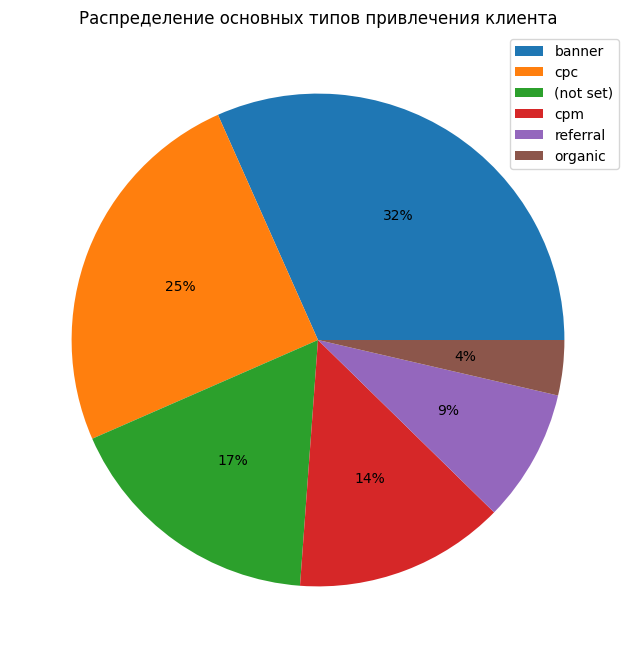

In [91]:
allocation(df_sessions, 'utm_medium', 'Распределение основных типов привлечения клиента', 6)

In [61]:
df_sessions.device_category.value_counts()

mobile     1468357
desktop     366863
tablet       18013
Name: device_category, dtype: int64

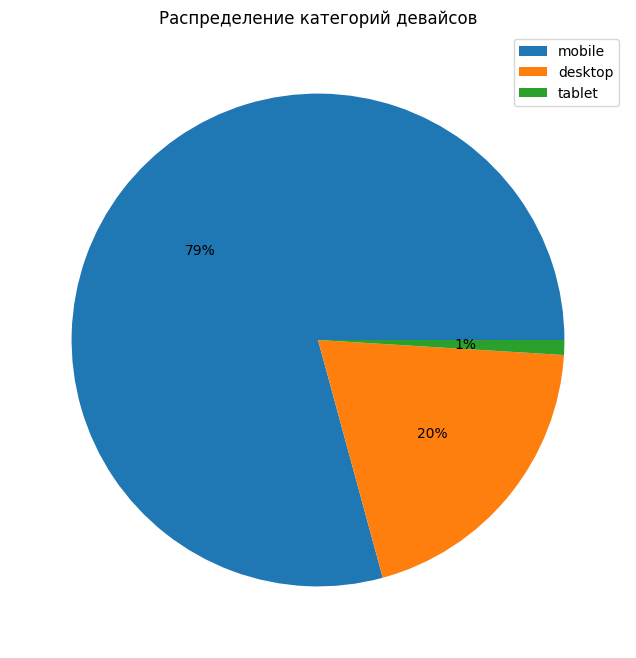

In [92]:
# отобразим визуально распределение категорий девайсов
allocation(df_sessions, 'device_category', 'Распределение категорий девайсов', 3)

In [65]:
df_sessions.head()

,session_id,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city,visit_dt
0,905543474558993299116377537921637753792,1,banner,mobile,Android,Huawei,Chrome,Russia,Zlatoust,2021-11-24 14:36:32
1,90554459701854946416368672901636867290,1,cpm,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,2021-11-14 08:21:30
2,905544604565178349916406485261640648526,1,banner,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2021-12-28 02:42:06
3,905544704636077027216222553281622255328,1,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00
4,905544704636077027216222553451622255345,2,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00


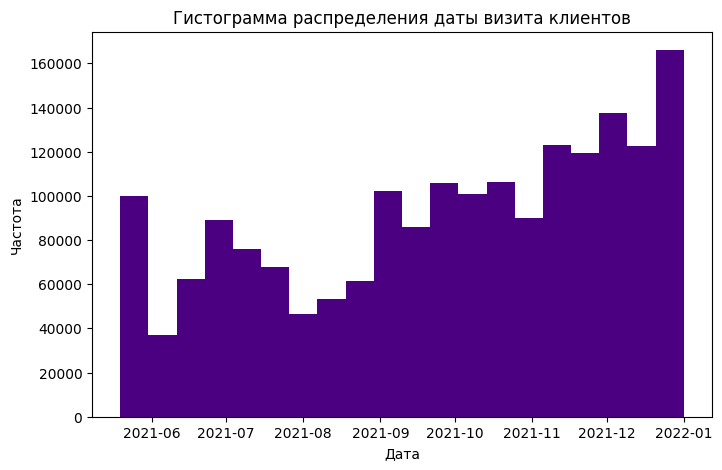

In [81]:
plt.figure(figsize=(8, 5))
plt.hist(df_sessions.visit_dt, bins=20, color='indigo')
plt.ylabel('Частота')
plt.xlabel('Дата')
plt.title('Гистограмма распределения даты визита клиентов');

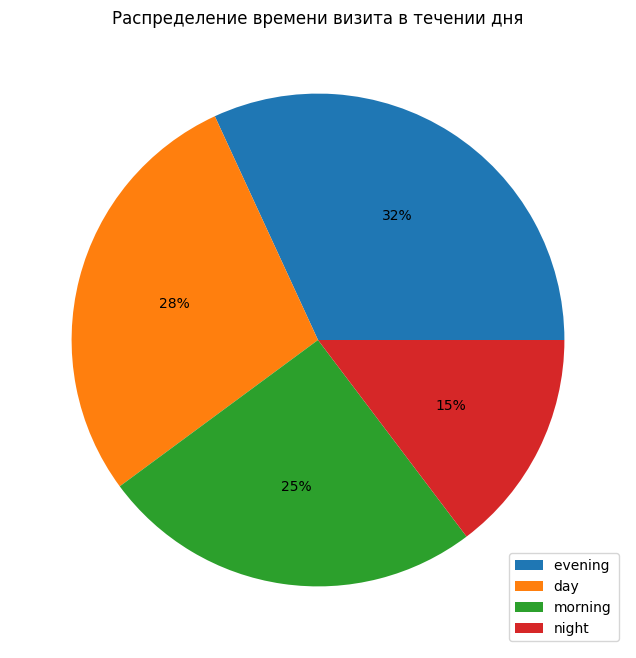

In [127]:
# распределение времени визита в течении дня
df2 = df_sessions.copy()
df2.visit_dt = df2.visit_dt.apply(lambda x: x.strftime('%H:%M'))
df2.visit_dt = df2.visit_dt.apply(lambda x: 'morning' if '05:00' < x < '12:00' else(
                                    'day' if '12:00' <= x < '17:00' else(
                                    'evening 'if '17:00' <= x < '23:00' else 'night')))

allocation(df2, 'visit_dt', 'Распределение времени визита в течении дня', 4)

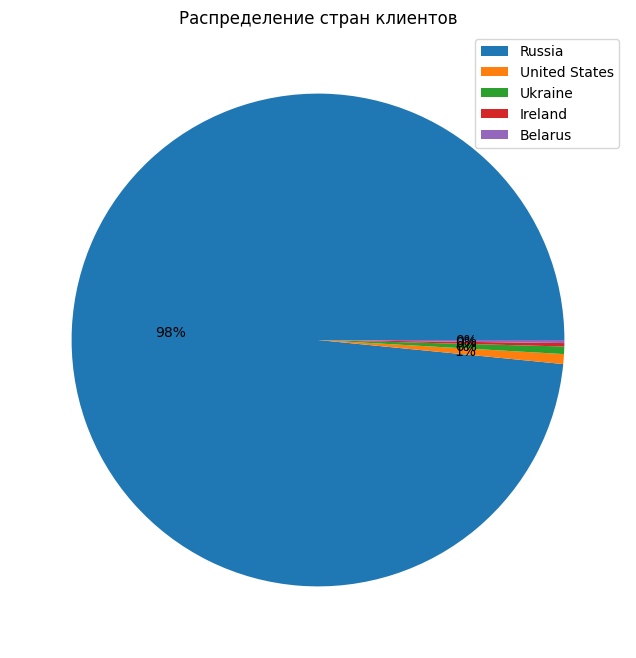

In [85]:
# посмотрим из какой страны клиенты чаще всего пользуются нашим сервисом
allocation('geo_country', 'Распределение стран клиентов', 5)

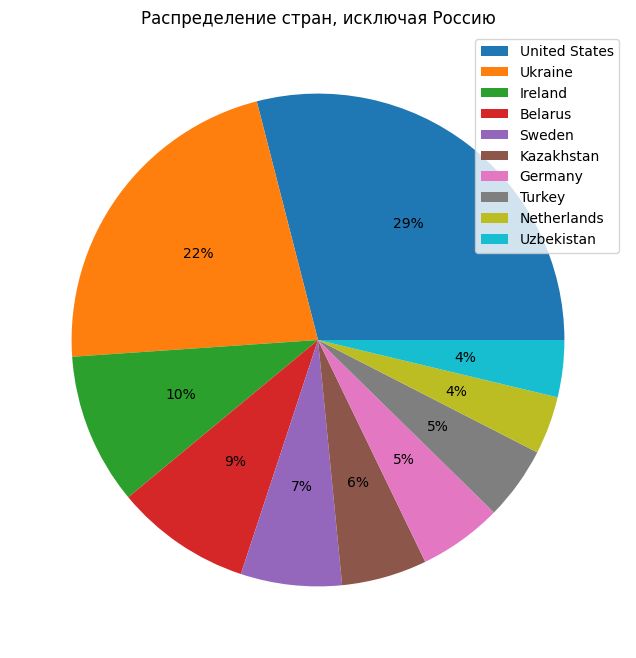

In [93]:
# ок, а если исключить Россию из списка, будут ли свои лидеры
df_not_russian = df_sessions[df_sessions.geo_country != 'Russia']
stat_country = df_not_russian.groupby(['geo_country'], as_index=False)[['session_id']].count()
stat_country = stat_country.sort_values('session_id', ascending=False)

allocation(df_not_russian, 'geo_country', 'Распределение стран, исключая Россию', 10)

In [128]:
df_sessions.head()

,session_id,visit_number,utm_medium,device_category,device_os,device_brand,device_browser,geo_country,geo_city,visit_dt
0,905543474558993299116377537921637753792,1,banner,mobile,Android,Huawei,Chrome,Russia,Zlatoust,2021-11-24 14:36:32
1,90554459701854946416368672901636867290,1,cpm,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,2021-11-14 08:21:30
2,905544604565178349916406485261640648526,1,banner,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,2021-12-28 02:42:06
3,905544704636077027216222553281622255328,1,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00
4,905544704636077027216222553451622255345,2,cpc,mobile,Android,Xiaomi,Chrome,Russia,Moscow,2021-05-29 05:00:00


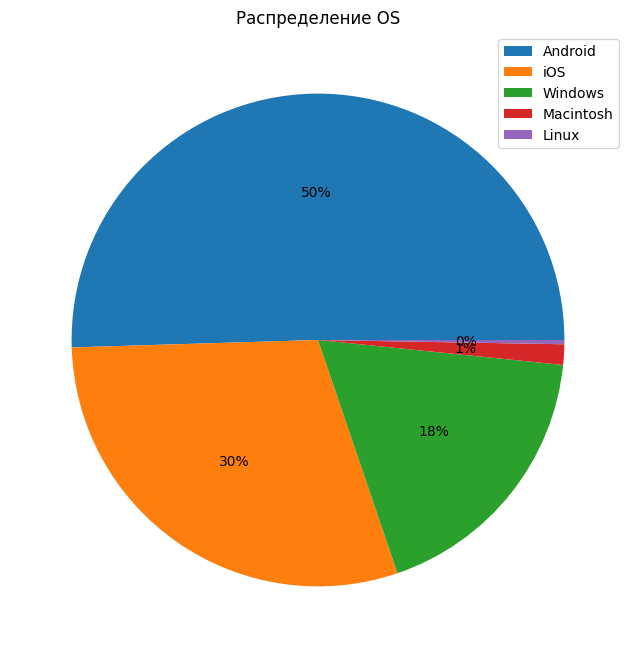

In [139]:
# на последок посмотрим распределение OC посетителей нашего сервиса
allocation(df_sessions, 'device_os', 'Распределение ОS', 5)

### Conclusion

Резюмируем по визуализации. Мы узнали что больше всего посетителей сервиса у нас пришло с помощью банеров, большая часть аудитории заходит с мобильных устройств, при том что самой распространенной OS на мобильном телефоне является Android. В признаке посещений сервиса очевидна положительная динамика, а самое нагруженное время на сервис это период времени с 17:00 до 23:00.